In [1]:
import sys, os
from pathlib import Path
root = Path.cwd().parent

if str(root) not in sys.path:
    sys.path.insert(0, str(root))
    
print('Added to sys.path:', root)

Added to sys.path: /home/spina/Desktop/units/DL/project/mice-representation-clean


In [3]:

import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress warnings globally
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

from representation.mapping import compute_area_scores
from representation.alex_extractor import build_alexnet_design_matrices_with_dataloader
from representation.plotter import plot_comparison

import pandas as pd
import os

IMAGE_FOLDER = "../Preproc2/images/"
NUM_WORKERS = 15

N_BOOT = 2
N_SPLITS = 2
PLS_N_COMPONENTS = 100

# LAYERS_KEEP = ["conv1", "conv2", "conv3", "conv4", "conv5", "fc6", "fc7"]
LAYERS_KEEP = ["pool1","pool2","relu3","relu4","pool5","fc6_relu","fc7_relu"]

# Match CSV filenames
MODELS = [
    "random",
    "supervised_no-diet",
    # "supervised_diet",
    # "self_supervised_no-diet",
    # "self_supervised_diet",
]

SCORE_DIR = os.path.join(root, "artifacts/pls")

In [4]:
scores = {model_name: {} for model_name in MODELS}
for model_name in MODELS:
    scores[model_name]["median_scores"] = pd.read_csv(SCORE_DIR + f"/median_scores_{model_name}.csv")

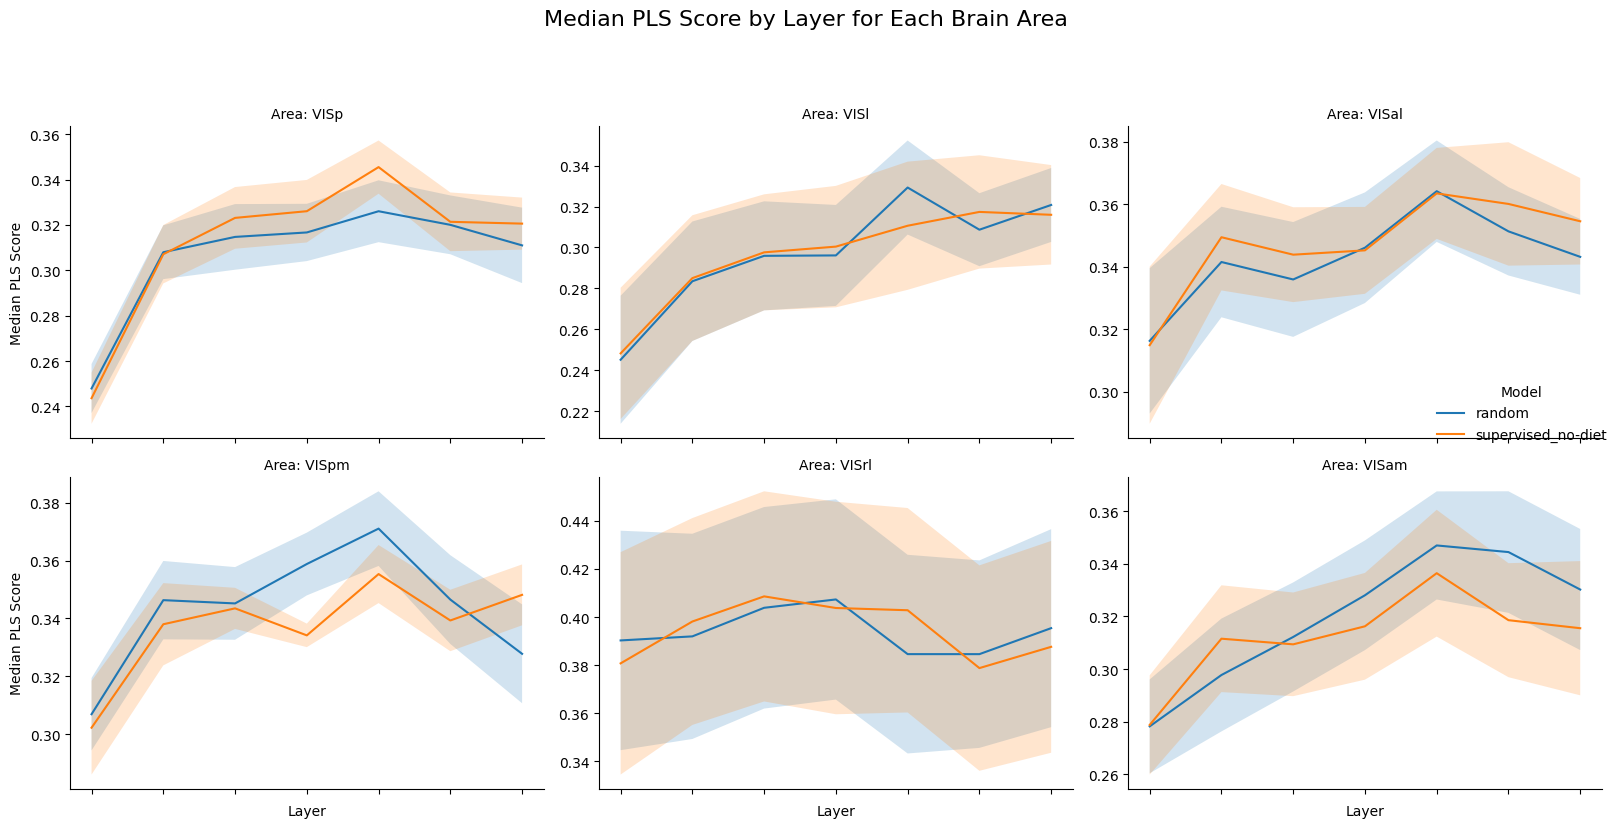

In [5]:
from representation.plotter import plot_comparison_multi

# items = list(scores.items())  # [(label, value_dict), ...]
items = [
    (k, v) for k, v in scores.items()
    if isinstance(v, dict)
    and "median_scores" in v
    and v["median_scores"] is not None
    and (not hasattr(v["median_scores"], "empty") or not v["median_scores"].empty)
]

labels = [k for k, _ in items]
series = [v["median_scores"] for _, v in items]

plot_comparison_multi(series, labels, sharey=False)

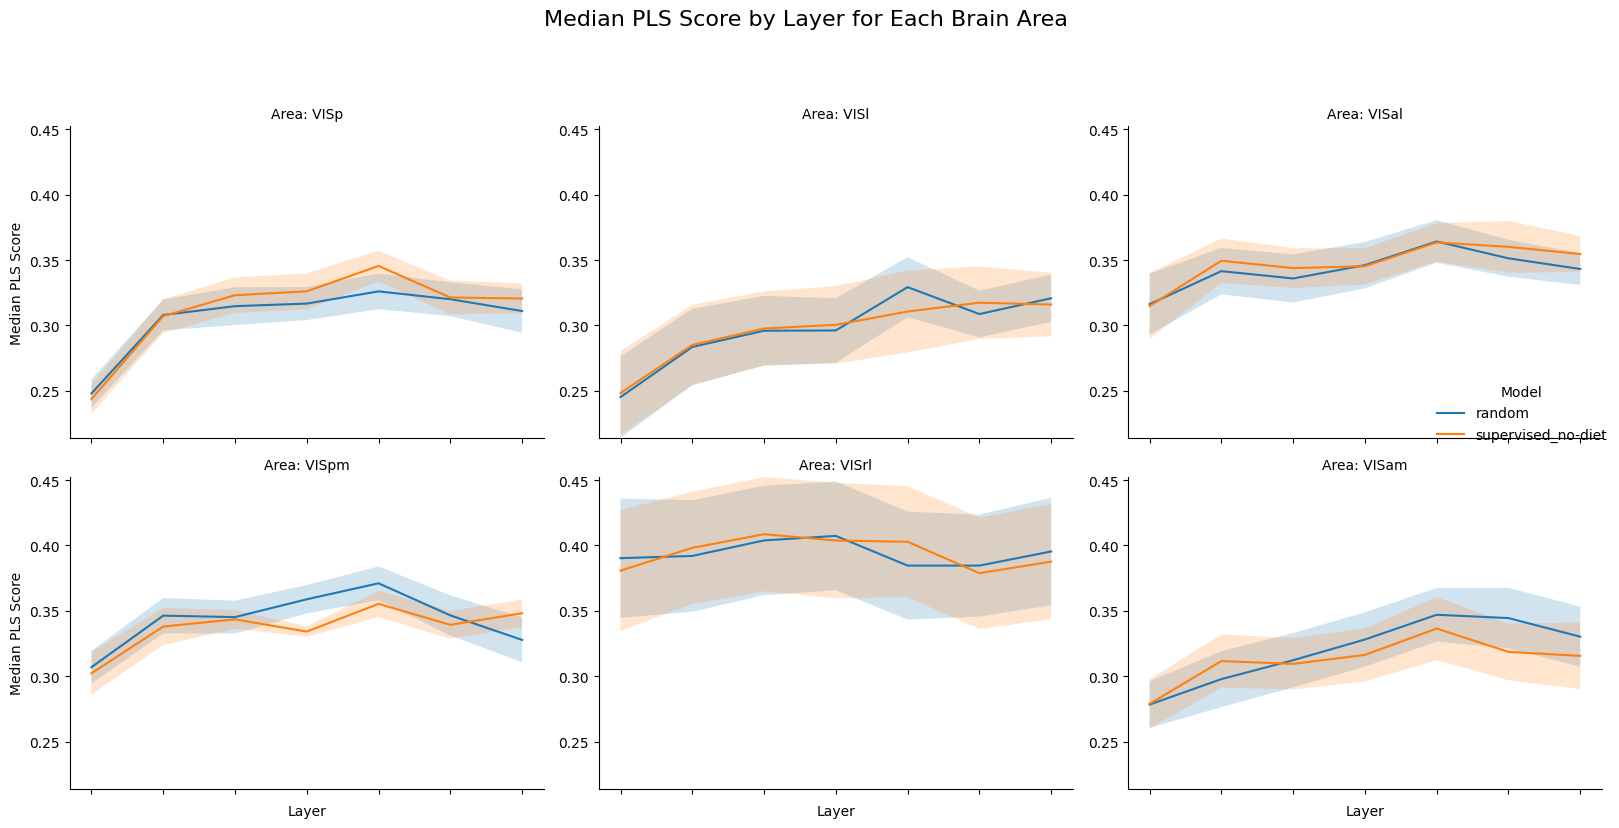

In [6]:
plot_comparison_multi(series, labels, sharey=True)